In [73]:
import numpy as np
import matplotlib.pyplot as plt
import getopt
import sys
from scipy import interpolate

# Input data

In [74]:
def read_file(source,column):
    x = np.loadtxt(source, usecols=(0,)) #, skiprows=1);
    y = np.loadtxt(source, usecols=(column,)) #, skiprows=1);
    x = np.concatenate([[0],x])
    y = np.concatenate([[0],y])
    return x,y

def remove_bigger_than(x_raw,y_raw,limit):
    args = np.argwhere(x_raw > limit)
    x = np.delete(x_raw, args);
    y = np.delete(y_raw, args);
    return x,y

In [127]:
source0 = "12at7-Vg-0.txt"
column0 = 1
points0 = 20
    
x0_raw, y0_raw = read_file(source0,column0)
x0,y0 = remove_bigger_than(x0_raw,y0_raw,300)

lines0=len(x0)
number0=int(x0[lines0-1]*points0) # how many number to interpolate between x[i] and x[i+1]

print(x0)
print(y0)

[  0.           1.66915276   5.72009047  11.60970773  17.85962474
  22.63912926  25.9482213   31.83252701  36.9802986   41.76245889
  48.38329873  57.5846638   62.0012128   67.33710158  72.30472329
  77.45780642  82.24262249  87.40101716  92.37129464  97.34157213
 103.23384516 108.02397277 112.07756625 117.9685114  122.39169983
 127.17917166 132.34022211 141.55221027 157.77455151 167.36011827
 172.15555742 181.37816867 191.70823688 196.13540897 211.99745046
 221.59364031 231.560753   235.99058086 246.69688345 251.86324544
 269.96144704 281.03867247 292.11589789]
[ 0.          0.32526569  0.72183886  1.26235487  1.72996995  2.08969428
  2.34152787  2.80940852  3.20518495  3.60122697  4.14121183  4.96987912
  5.36618671  5.83446573  6.26669263  6.73510444  7.16746414  7.70851131
  8.1770559   8.64560049  9.22243419  9.72742926 10.16032011 10.71899497
 11.20609677 11.67477415 12.252139   13.22607703 15.06659349 16.14921898
 16.72684941 17.84605817 19.10974093 19.65131925 21.56473666 22.79

In [128]:
source = "12at7-Vg-1.txt"
column = 1
points = 20

x_raw, y_raw = read_file(source,column)

args = np.argwhere(x_raw > 300)
x = np.delete(x_raw, args);
y = np.delete(y_raw, args);

print(x)
print(y)

lines=len(x)
number=int(x[lines-1]*points) # how many number to interpolate between x[i] and x[i+1]

[  0.          23.41372946  26.89367616  34.03637523  38.98407865
  42.64948677  45.94662783  52.54754939  57.31643082  65.38909274
  68.69021746  73.82869385  76.76553516  82.63921779  87.0451437
 102.84079089 113.86490087 121.95349743 132.61730767 141.07682706
 146.96378855 157.26729904 163.15160475 176.76951882 181.92525772
 197.01889582 202.17197895 207.32771785 207.32771785 217.27092859
 227.21413933 236.42612749 251.16743315 262.59964678 272.55613638
 286.20060817 297.26986628]
[ 0.          0.18235195  0.27062318  0.44703284  0.60687712  0.73133324
  0.81973726  1.08733949  1.30179309  1.69544491  1.83832545  2.10698999
  2.26829495  2.59090487  2.84194172  3.84741704  4.60212108  5.213679
  6.04128398  6.72521169  7.22941002  8.12991594  8.59779659  9.82277148
 10.32750096 11.73300195 12.20141376 12.70614324 12.70614324 13.67955011
 14.65295698 15.626895   17.21424999 18.54977138 19.70476667 21.29291838
 22.66502304]


In [77]:
!tail 12at7-Vg-2.txt

361.2252847209005  22.25537019249921
366.38899093939085  22.869052730355026
370.26243454628343  23.33839405461152
377.08732621291324  24.168787595773775
381.514498302519  24.710365921132414
385.94432616422404  25.288261929949577
390.73976531827213  25.86589236155681
394.4330590510925  26.371684157876793
400.7042222350093  27.129840697936903
405.5023171611567  27.743788813002656


In [130]:
source2 = "12at7-Vg-2.txt"
column2 = 1
points2 = 20

x2_raw,y2_raw = read_file(source2,column2)
x2,y2 = remove_bigger_than(x2_raw,y2_raw,400)

print(x2)
print(y2)

lines2=len(x2)
number2=int(x2[lines2-1]*points2) # how many number to interpolate between x[i] and x[i+1]

[  0.          69.66488582  74.41916051  76.25120063  78.44486838
  81.37507027 104.62724025 113.60197944 118.0025938  123.13310287
 127.53238935 131.93565949 142.93586753 162.75589471 171.57040231
 177.45205225 186.63748268 192.15086556 198.03517128 206.12376783
 211.63980648 217.52145643 225.61536453 231.50232601 237.75755457
 242.17675934 247.32984247 252.4829256  258.37519863 261.32133515
 267.95014231 272.37200285 277.53039752 281.95491384 287.11330852
 292.27170319 301.85195841 306.27647473 312.72778779 316.96949846
 322.50147174 328.39905632 335.77502069 341.12153256 347.57550139
 352.37094054 357.1663797  361.22528472 366.38899094 370.26243455
 377.08732621 381.5144983  385.94432616 390.73976532 394.43305905]
[ 0.          0.16691528  0.18162161  0.23477025  0.23317679  0.30368754
  0.77711211  1.00667041  1.18507191  1.3447834   1.50502605  1.71974522
  2.14759011  3.18646176  3.72485316  4.15641612  4.76717731  5.16268817
  5.63056882  6.24212674  6.67395529  7.10551825  7.78

In [132]:
source3 = "12at7-Vg-3.txt"
column3 = 1
points3 = 20

x3_raw,y3_raw = read_file(source3,column3)
x3,y3 = remove_bigger_than(x3_raw,y3_raw,300)

print(x3)
print(y3)

lines3=len(x3)
number3=int(x3[lines3-1]*points3) # how many number to interpolate between x[i] and x[i+1]

[  0.         109.51784458 122.32220712 142.81901356 147.21166061
 152.33818602 153.0694086  162.59389261 168.45960792 171.3898098
 180.55664983 188.26104469 192.29604777 197.43452415 213.21822037
 222.03272796 222.76660632 230.84723556 237.0944968  237.0944968
 242.23961261 251.42769882 257.67496005 264.29314412 271.28225103
 276.43267839 283.4217853  292.61783882]
[0.         0.1561262  0.25578405 0.54961204 0.61906048 0.72429545
 0.72376429 0.97108307 1.18473993 1.25525068 1.61178809 1.9693878
 2.14805487 2.41671941 3.25876515 3.79715655 3.83294308 4.33554795
 4.76684534 4.76684534 5.12630409 5.77338297 6.20468036 6.70834753
 7.2843845  7.71647862 8.29251559 9.04854751]


## Cubic spline

<IPython.core.display.Javascript object>


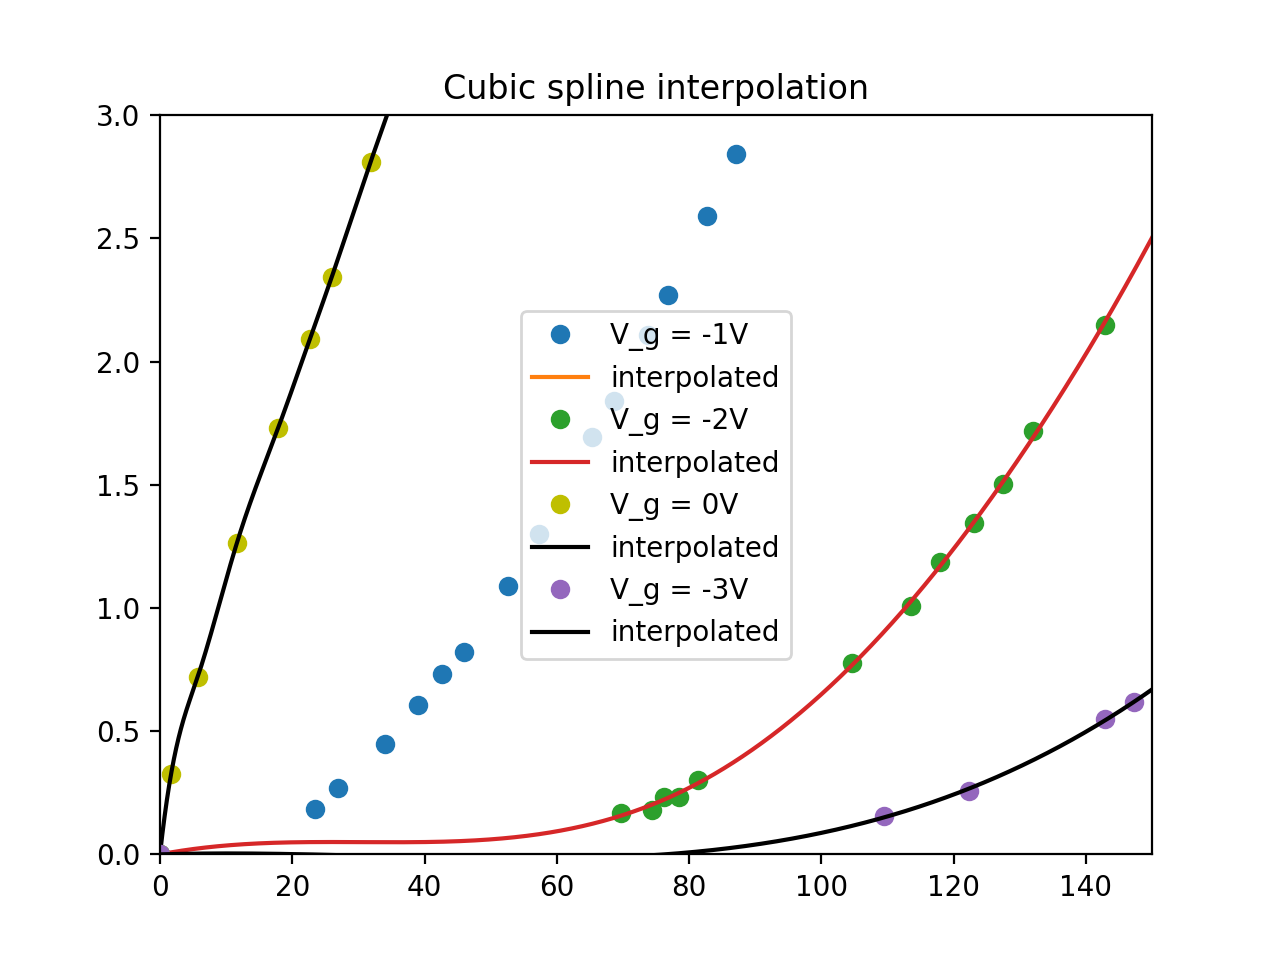

In [133]:
%matplotlib notebook

tck = interpolate.splrep(x, y, s=0)  # s - amount of smoothing; s = 0 -> no smoothing; no smoothing defined, so s = m - sqrt(2*m), where m = num data pts being fit
#print(tck)
#x_new = np.linspace(x[0], x[lines-1], num=number, endpoint=True )
x_new = np.linspace(0, x[lines-1], num=number, endpoint=True )
#print x_new
y_new = interpolate.splev(x_new, tck, der=0)
#print y_new

tck2 = interpolate.splrep(x2, y2, s=0.01)  # s - amount of smoothing; s = 0 -> no smoothing; no smoothing defined, so s = m - sqrt(2*m), where m = num data pts being fit
#print(tck)
#x_new = np.linspace(x[0], x[lines-1], num=number, endpoint=True )
x_new2 = np.linspace(0, x2[lines2-1], num=number2, endpoint=True )
#print x_new
y_new2 = interpolate.splev(x_new2, tck2, der=0)
#print y_new

tck0 = interpolate.splrep(x0, y0, s=0)  # s - amount of smoothing; s = 0 -> no smoothing; no smoothing defined, so s = m - sqrt(2*m), where m = num data pts being fit
#print(tck)
#x_new = np.linspace(x[0], x[lines-1], num=number, endpoint=True )
x_new0 = np.linspace(0, x0[lines0-1], num=number0, endpoint=True )
#print x_new
y_new0 = interpolate.splev(x_new0, tck0, der=0)
#print y_new

tck3 = interpolate.splrep(x3, y3, s=0.001)  # s - amount of smoothing; s = 0 -> no smoothing; no smoothing defined, so s = m - sqrt(2*m), where m = num data pts being fit
#print("tck3", tck3)
x_new3 = np.linspace(0, x3[lines3-1], num=number3, endpoint=True )
#print("x_new3", x_new3)
y_new3 = interpolate.splev(x_new3, tck3, der=0)
#print("y_new3", y_new3)

plt.plot(x, y, 'o', x_new, y_new, '-', x2, y2, 'o', x_new2, y_new2, '-', x0, y0, 'yo', x_new0, y_new0, 'k-', x3, y3, 'o', x_new3, y_new3, 'k-')
plt.legend(['V_g = -1V', 'interpolated','V_g = -2V', 'interpolated','V_g = 0V', 'interpolated', 'V_g = -3V', 'interpolated'], loc='best')
plt.xlim(0,150)
plt.ylim(0,3)
plt.title("Cubic spline interpolation")
plt.show()

Fitting error (for zero smoothing the points are exact)

```
for i in range(0,lines):
    y_int = interpolate.splev(x[i], tck, der=0)
    print(y[i],y[i]-y_int)
```

In [134]:
print(interpolate.splev(77, tck3, der=0))

0.0014632491634061912


## Polyfit

##### V_g = -1 V

In [149]:
power = 4

print(power, "-order polynomial fitting\n")

x_raw,y_raw = read_file(source,column)
x,y = remove_bigger_than(x_raw,y_raw,200)

z1 = np.polyfit(x,y,power);
print("Polynomial coefficients: ", z1, "\n")

p1 = np.poly1d(z1);

pts = []
print("Calculating deviation")
for T in range(0, len(x)): # go through each temperature value
    dev = 0
    for i in range(0, power+1): # go through each power
        xpow = power - i
        dev += z1[i]*(x[T]**xpow);
    pts.append(dev)

print("Differences:")
diff = pts - y

#print "Fitted points"
#print pts, "\n"
for i in range(0, len(diff)):
    print("V = %f, I = %e" % (x[i], diff[i]))

print("\nMean absolute diff full temp range:")
abs_diff = 0.0
for i in range(0, len(pts)):
    abs_diff += abs(diff[i])
abs_diff = abs_diff/len(pts);
print("%e" % (abs_diff))

print("Mean absolute diff for V=[0-50]:")
abs_diff_small = 0.0
for i in range(0, len(pts)):
    if (( x[i] >= 0 ) and ( x[i] <= 50 )):
        abs_diff_small += abs(diff[i])
abs_diff_small = abs_diff_small/len(pts)
print ("%e" % (abs_diff_small))

4 -order polynomial fitting

Polynomial coefficients:  [ 1.19826424e-09 -1.09229650e-06  4.77743321e-04 -1.22137938e-03
 -1.38491049e-02] 

Calculating deviation
Differences:
V = 0.000000, I = -1.384910e-02
V = 23.413729, I = 2.344206e-02
V = 26.893676, I = 7.597818e-03
V = 34.036375, I = 9.538932e-03
V = 38.984079, I = -4.233181e-03
V = 42.649487, I = -9.042671e-03
V = 45.946628, I = 1.824596e-02
V = 52.547549, I = 4.444807e-03
V = 57.316431, I = -8.918941e-03
V = 65.389093, I = -2.994043e-02
V = 68.690217, I = -9.254282e-03
V = 73.828694, I = -1.094550e-02
V = 76.765535, I = -1.310363e-02
V = 82.639218, I = -3.630396e-03
V = 87.045144, I = 6.076952e-03
V = 102.840791, I = 1.182683e-02
V = 113.864901, I = 2.788842e-02
V = 121.953497, I = 1.270618e-02
V = 132.617308, I = 8.112787e-03
V = 141.076827, I = 4.694785e-03
V = 146.963789, I = -1.245216e-02
V = 157.267299, I = -3.551462e-02
V = 163.151605, I = 1.121798e-02
V = 176.769519, I = 1.232555e-02
V = 181.925258, I = -1.607278e-02
V = 

Compare values:

In [150]:
for i in range(0,50,5):
    print(p1(i))

-0.013849104854201705
-0.008148206867486745
0.020631119606436064
0.07169661314143219
0.14427398627503565
0.23760692550844875
0.3509570913065421
0.4836041180978552
0.6348456142745955
0.803997162192639


#### V_g = -2 V

In [160]:
power2 = 4
print(power2, "-order polynomial fitting\n")

x2_raw,y2_raw = read_file(source2,column2)
x2,y2 = remove_bigger_than(x2_raw,y2_raw,150)

spline2_60 = [60, 0.07440737502106537]

args = np.argwhere(x2 > 60)
x2 = np.insert(x2,args[0],spline2_60[0])
y2 = np.insert(y2,args[0],spline2_60[1])
print(x2,y2)

z2 = np.polyfit(x2,y2,power2);
print("Polynomial coefficients: ", z2, "\n")

p2 = np.poly1d(z2);

pts2 = []
print("Calculating deviation")
for T in range(0, len(x2)): # go through each temperature value
    dev = 0
    for i in range(0, power2+1): # go through each power
        xpow = power2 - i
        dev += z2[i]*(x2[T]**xpow);
    pts2.append(dev)

print("Differences:")
diff2 = pts2 - y2

#print "Fitted points"
#print pts, "\n"
for i in range(0, len(diff2)):
    print("V = %f, I = %e" % (x2[i], diff2[i]))

print("\nMean absolute diff full temp range:")
abs_diff2 = 0.0
for i in range(0, len(pts2)):
    abs_diff2 += abs(diff2[i])
abs_diff2 = abs_diff2/len(pts2);
print("%e" % (abs_diff2))

print("Mean absolute diff for V=[0-100]:")
abs_diff_small2 = 0.0
for i in range(0, len(pts2)):
    if (( x2[i] >= 0 ) and ( x2[i] <= 100 )):
        abs_diff_small2 += abs(diff2[i])
abs_diff_small2 = abs_diff_small2/len(pts2)
print ("%e" % (abs_diff_small2))

4 -order polynomial fitting

[  0.          60.          69.66488582  74.41916051  76.25120063
  78.44486838  81.37507027 104.62724025 113.60197944 118.0025938
 123.13310287 127.53238935 131.93565949 142.93586753] [0.         0.07440738 0.16691528 0.18162161 0.23477025 0.23317679
 0.30368754 0.77711211 1.00667041 1.18507191 1.3447834  1.50502605
 1.71974522 2.14759011]
Polynomial coefficients:  [-8.54905498e-09  3.44190965e-06 -2.54184084e-04  6.06263759e-03
 -1.51597425e-04] 

Calculating deviation
Differences:
V = 0.000000, I = -1.515974e-04
V = 60.000000, I = 6.793314e-03
V = 69.664886, I = -1.597888e-02
V = 74.419161, I = 1.804298e-02
V = 76.251201, I = -1.358455e-02
V = 78.444868, I = 1.585510e-02
V = 81.375070, I = -1.384654e-02
V = 104.627240, I = -7.773519e-03
V = 113.601979, I = 2.382940e-02
V = 118.002594, I = -1.130819e-02
V = 123.133103, I = 8.201520e-03
V = 127.532389, I = 1.169463e-02
V = 131.935659, I = -3.029415e-02
V = 142.935868, I = 8.520464e-03

Mean absolute diff f

Compare values:

In [155]:
for i in range(0,50,5):
    print(p2(i))

0.0010001462330215803
-0.009415894324783868
-0.019587745879815825
-0.028699320747260147
-0.03595657968622858
-0.04058753189975881
-0.04184223503481438
-0.03899279518228479
-0.03133336687698542
-0.018180153097657553


#### V_g = 0 V

In [156]:
power0 = 8

args0 = np.argwhere(x0 > 150)
x0 = np.delete(x0, args0);
y0 = np.delete(y0, args0);

print(power0, "-order polynomial fitting\n")

z0 = np.polyfit(x0,y0,power0);
print("Polynomial coefficients: ", z0, "\n")

p0 = np.poly1d(z0);

pts0 = []
print("Calculating deviation")
for T in range(0, len(x0)): # go through each temperature value
    dev = 0
    for i in range(0, power0+1): # go through each power
        xpow = power0 - i
        dev += z0[i]*(x0[T]**xpow);
    pts0.append(dev)

print("Differences:")
diff0 = pts0 - y0

#print "Fitted points"
#print pts, "\n"
for i in range(0, len(diff0)):
    print("V = %f, I = %e" % (x0[i], diff0[i]))

print("\nMean absolute diff full temp range:")
abs_diff0 = 0.0
for i in range(0, len(pts0)):
    abs_diff0 += abs(diff0[i])
abs_diff0 = abs_diff0/len(pts0);
print("%e" % (abs_diff0))

print("Mean absolute diff for V=[0-50]:")
abs_diff_small0 = 0.0
for i in range(0, len(pts0)):
    if (( x0[i] >= 0 ) and ( x0[i] <= 50 )):
        abs_diff_small0 += abs(diff0[i])
abs_diff_small0 = abs_diff_small0/len(pts0)
print ("%e" % (abs_diff_small0))

8 -order polynomial fitting

Polynomial coefficients:  [-2.35949756e-15  1.50142851e-12 -3.97412026e-10  5.65911521e-08
 -4.68182966e-06  2.26431693e-04 -5.95163006e-03  1.51055644e-01
  3.40719819e-02] 

Calculating deviation
Differences:
V = 0.000000, I = 3.407198e-02
V = 1.669153, I = -5.462305e-02
V = 5.720090, I = 1.925037e-02
V = 11.609708, I = 3.510569e-03
V = 17.859625, I = 7.875067e-03
V = 22.639129, I = -1.304046e-03
V = 25.948221, I = -5.769446e-03
V = 31.832527, I = -1.769745e-02
V = 36.980299, I = 2.338027e-03
V = 41.762459, I = 3.830045e-03
V = 48.383299, I = 2.626825e-02
V = 57.584664, I = -6.485741e-03
V = 62.001213, I = -1.570419e-02
V = 67.337102, I = -1.077132e-02
V = 72.304723, I = 4.508945e-03
V = 77.457806, I = 8.879089e-03
V = 82.242622, I = 2.412068e-02
V = 87.401017, I = -2.502504e-02
V = 92.371295, I = -1.115163e-02
V = 97.341572, I = 9.716777e-03
V = 103.233845, I = 2.009382e-02
V = 108.023973, I = -3.220338e-03
V = 112.077566, I = -2.581374e-02
V = 117.96851

Compare values:

In [140]:
for i in range(0,50,5):
    print(p0(i))

0.034071981937934745
0.6661080226704351
1.1343552935774779
1.526676835564489
1.894412376498757
2.2642772934345996
2.6473877320664485
3.0458730035841937
3.4574992170185657
3.8786909430777534


In [141]:
power3 = 3

x3,y3 = read_file(source3,column3)
x3,y3 = remove_bigger_than(x3_raw,y3_raw,220)

x3 = np.delete(x3,0)
y3 = np.delete(y3,0)

spline3_100 = [100, 0.09825345566970928]
spline3_85 = [85, 0.02867970762490407]
spline3_77 = [77, 0.01016196053932615]

args = np.argwhere(x3 > 100)
x3 = np.insert(x3,args[0],spline3_100[0])
y3 = np.insert(y3,args[0],spline3_100[1])
args = np.argwhere(x3 > 85)
x3 = np.insert(x3,args[0],spline3_85[0])
y3 = np.insert(y3,args[0],spline3_85[1])
args = np.argwhere(x3 > 77)
x3 = np.insert(x3,args[0],spline3_77[0])
y3 = np.insert(y3,args[0],spline3_77[1])
print(x3,y3)

print(power3, "-order polynomial fitting\n")

z3 = np.polyfit(x3,y3,power3);
print("Polynomial coefficients: ", z3, "\n")

p3 = np.poly1d(z3);

pts3 = []
print("Calculating deviation")
for T in range(0, len(x3)): # go through each temperature value
    dev = 0
    for i in range(0, power3+1): # go through each power
        xpow = power3 - i
        dev += z3[i]*(x3[T]**xpow);
    pts3.append(dev)

print("Differences:")
diff3 = pts3 - y3

#print "Fitted points"
#print pts, "\n"
for i in range(0, len(diff3)):
    print("V = %f, I = %e" % (x3[i], diff3[i]))

print("\nMean absolute diff full temp range:")
abs_diff3 = 0.0
for i in range(0, len(pts3)):
    abs_diff3 += abs(diff3[i])
abs_diff3 = abs_diff3/len(pts3);
print("%e" % (abs_diff3))

print("Mean absolute diff for V=[50-150]:")
abs_diff_small3 = 0.0
for i in range(0, len(pts3)):
    if (( x3[i] >= 50 ) and ( x3[i] <= 150 )):
        abs_diff_small3 += abs(diff3[i])
abs_diff_small3 = abs_diff_small3/len(pts3)
print ("%e" % (abs_diff_small3))

[ 77.          85.         100.         109.51784458 122.32220712
 142.81901356 147.21166061 152.33818602 153.0694086  162.59389261
 168.45960792 171.3898098  180.55664983 188.26104469 192.29604777
 197.43452415 213.21822037] [0.01016196 0.02867971 0.09825346 0.1561262  0.25578405 0.54961204
 0.61906048 0.72429545 0.72376429 0.97108307 1.18473993 1.25525068
 1.61178809 1.9693878  2.14805487 2.41671941 3.25876515]
3 -order polynomial fitting

Polynomial coefficients:  [ 9.63558494e-07 -1.87439537e-04  1.31114787e-02 -3.17159290e-01] 

Calculating deviation
Differences:
V = 77.000000, I = 1.082985e-02
V = 85.000000, I = 6.131399e-03
V = 100.000000, I = -1.510175e-02
V = 109.517845, I = -1.981834e-02
V = 122.322207, I = -1.014876e-02
V = 142.819014, I = -1.049817e-02
V = 147.211661, I = 5.895472e-03
V = 152.338186, I = 1.249813e-02
V = 153.069409, I = 3.004646e-02
V = 162.593893, I = 3.012304e-02
V = 168.459608, I = -5.983469e-03
V = 171.389810, I = 1.984751e-02
V = 180.556650, I = -4.743

Compare values:

In [142]:
for i in range(0,100,5):
    print(p3(i))

-0.3171592904538195
-0.2561674405487193
-0.20382489860955788
-0.15940899576577452
-0.12219706314680862
-0.09146643188209944
-0.06649443310108638
-0.046558397933208706
-0.030935657507905834
-0.018903542954617047
-0.009739385402781686
-0.002720515981839089
0.0028757341787714052
0.007772033949610402
0.012691052201238728
0.01835545780421688
0.025487919629105682
0.03481110654646552
0.04704768742685739
0.062920331140842


<IPython.core.display.Javascript object>


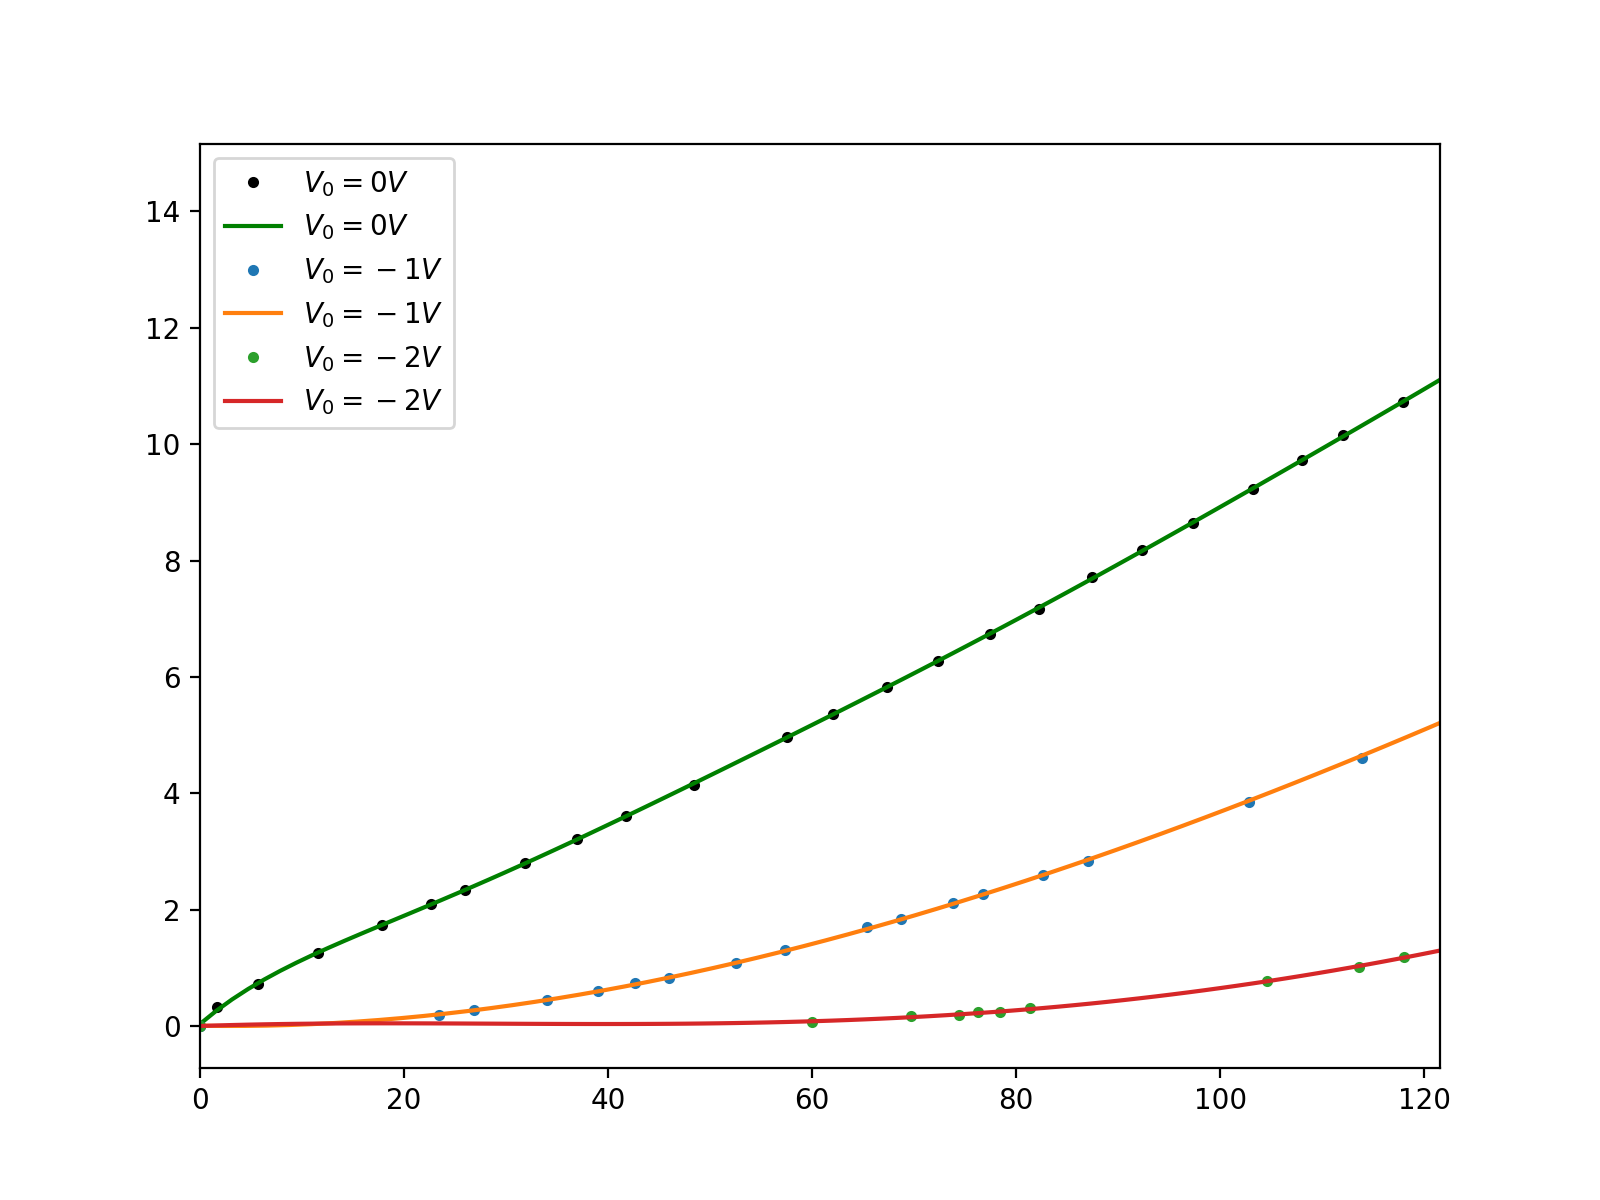

In [161]:
%matplotlib notebook
fig0=plt.figure(figsize=(8,6), dpi= 100)
ax0 = fig0.add_subplot(111)

xp = np.linspace(0, x[-1]*1.1, 100);
xp2 = np.linspace(0, x2[-1]*1.1, 100);
xp0 = np.linspace(0, x0[-1]*1.1, 100);
#xp3 = np.linspace(0, x3[-1]*1.1, 100);

ax0.plot(x0, y0, 'k.', xp0, p0(xp0), 'g-', label='$V_0 = 0 V$');
ax0.plot(x, y, '.', xp, p(xp), '-', label='$V_0 = -1 V$');
ax0.plot(x2, y2, '.', xp2, p2(xp2), '-', label='$V_0 = -2 V$');
#ax0.plot(x3, y3, 'c.', xp3, p3(xp3), 'b-', label='$V_0 = -3 V$');
ax0.set_xlim(0,x0[-1]-20);
#ax0.set_ylim(0,y0[-1]-14);
ax0.legend(loc='best');

## Load line

In [162]:
def cross(pol1,pol2):
    idx_cross = np.argwhere(np.diff(np.sign(pol1(x_cross) - pol2(x_cross)))).flatten()
    v = (x_cross[idx_cross][0])
    i = (pol2(x_cross[idx_cross][0]))
    return v,i

<IPython.core.display.Javascript object>


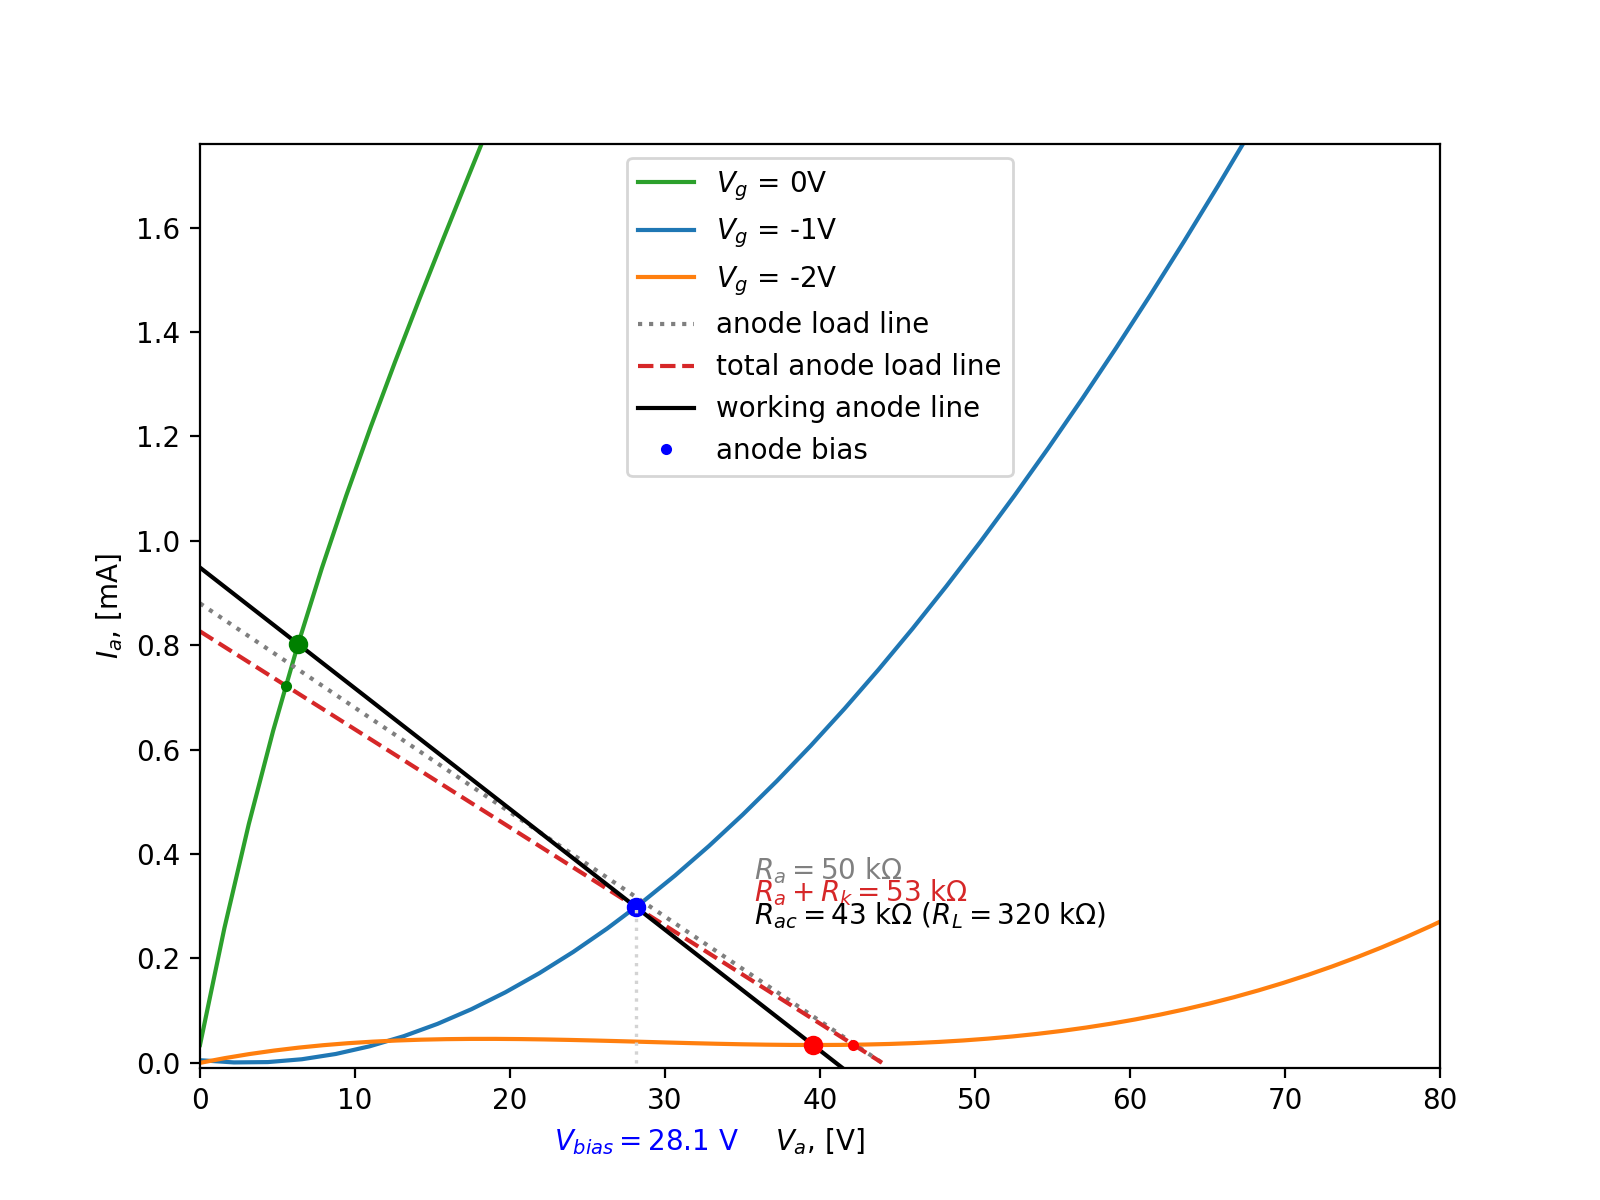

I_a = 0.88 mA
Anode bias point for 50000 ohm anode resistor: 28.57 V, 309 uA

Operating voltage range:
[22.65; 13.69] V

Cathode load resistor:
R_k =  3240 ohm

Total load resistance: 53240 ohm
Anode bias point for 50000 ohm anode resistor and 3240 ohm cathode resistor: 28.12 V, 298 uA
Load line crosses V_g = 0V at : 5.53 V, 723 uA
Load line crosses V_g = 2V at : 42.15 V, 35 uA

Operating voltage range:
[23.04; 13.58] V

Second harmonic distortion:  12 %

Avg gain: 18.3 V

Maximum output swing -1 V -> 0 V: 1.87 V
Maximum output swing -1 V -> -2 V: 81.94 V
The amplification factor mu is the same as above.

Transconductance factor g_m -1 V -> 0 V: 2.20 mA
Transconductance factor g_m -1 V -> -2 V: 0.26 mA

AC high-pass filter resistor:  320000 ohm
AC resistance:  43243 ohm
AC current at 10V voltage swing: 231 uA
AC + total bias current = 529 uA
Bias point for 53240 ohm anode resistor: 28.12 V, 298 uA
Load line crosses V_g = 0V at : 6.32 V, 802 uA
Load line crosses V_g = 2V at : 39.54 V, 3

In [166]:
%matplotlib notebook
fig=plt.figure(figsize=(8,6), dpi= 100)
ax = fig.add_subplot(111)

B = 44.0# V
R_a = 50000 # ohm
R_coupling = 320000 #ohm # High pass filter to filter the DC from the signal

I_a = B/R_a*1000 # mA
print('I_a = %.2f mA' % (I_a))

if (B > 350/2):
    xlim = 350
else:
    xlim = 2*B

xlim = 80
ax.set_xlim(0,xlim)
ax.set_ylim(-0.01,2*I_a);
ax.set_xlabel('$V_a$, [V]')
ax.set_ylabel('$I_a$, [mA]')

z_load = [-I_a/B,I_a]
p_load = np.poly1d(z_load);
x_load = [0,B]

V_gk = 1 # grid current is -1V and the swing will be between 0 and -2 V
x_cross = np.arange(0,2*B,0.01);
#print(x_cross)

V_a_bias,I_a_bias = cross(p,p_load)
V0_cross,I0_cross = cross(p0,p_load)
V2_cross,I2_cross = cross(p2,p_load)

print("Anode bias point for %d ohm anode resistor: %.2f V, %.0f uA\n" % (R_a, V_a_bias, I_a_bias*1000))
#print("Load line crosses V_g = 0V at : %.2f V, %.0f uA\n" % (V0_cross, I0_cross*1000))
#print("Load line crosses V_g = 2V at : %.2f V, %.0f uA\n" % (V2_cross, I2_cross*1000))

print("Operating voltage range:")
print('[%.2f; %.2f] V\n' % (V_a_bias - V0_cross, V2_cross - V_a_bias))

#######################################

print("Cathode load resistor:")
R_k = V_gk/I_a_bias*1000
print('R_k = ', int(R_k), 'ohm\n')

R_a_total = R_a + R_k
print('Total load resistance: %d ohm' % (int(R_a_total)))

I_a_total = B/R_a_total*1000 # mA
z_total_load = [-I_a_total/B,I_a_total]
p_total_load = np.poly1d(z_total_load);
x_total_load = [0,B]

V_a_bias_total,I_a_bias_total = cross(p,p_total_load)
V0_cross_total,I0_cross_total = cross(p0,p_total_load)
V2_cross_total,I2_cross_total = cross(p2,p_total_load)

print("Anode bias point for %d ohm anode resistor and %d ohm cathode resistor: %.2f V, %.0f uA" % (R_a, R_k, V_a_bias_total, I_a_bias_total*1000))
print("Load line crosses V_g = 0V at : %.2f V, %.0f uA" % (V0_cross_total, I0_cross_total*1000))
print("Load line crosses V_g = 2V at : %.2f V, %.0f uA\n" % (V2_cross_total, I2_cross_total*1000))

print("Operating voltage range:")
print('[%.2f; %.2f] V\n' % (V_a_bias - V0_cross_total, V2_cross_total - V_a_bias))

H2 = abs((V_a_bias - V0_cross_total) - (V2_cross_total - V_a_bias))/(2*((V_a_bias - V0_cross_total) + (V2_cross_total - V_a_bias)))
print("Second harmonic distortion: ", int(H2*100), '%\n')

gain = (V2_cross_total - V_a_bias + V_a_bias - V0_cross_total)/2
print("Avg gain: %.1f V\n" % (gain))

#######################################

# mu = d V_a / d V_g at I_a = const
# g_m = d I_a / d V_g at V_a = const

# max swing: the voltage at which p2 and p0 are the bias current
#x_cross_big = x_cross = np.arange(0,3*B,0.01)
z_swing_line = [0,I_a_bias_total]
p_swing_line = np.poly1d(z_swing_line)
V_0_swing, I_0_swing = cross(p0,p_swing_line)
V_2_swing, I_2_swing = cross(p2,p_swing_line)
print("Maximum output swing -1 V -> 0 V: %.2f V" % V_0_swing)
print("Maximum output swing -1 V -> -2 V: %.2f V" % V_2_swing)
mu_12 = V_2_swing/1
mu_10 = V_0_swing/1
print("The amplification factor mu is the same as above.\n")

gm_10 = (p0(V_a_bias_total)-I_a_bias_total)/1
gm_12 = (I_a_bias_total-p2(V_a_bias_total))/1
print("Transconductance factor g_m -1 V -> 0 V: %.2f mA" % gm_10)
print("Transconductance factor g_m -1 V -> -2 V: %.2f mA\n" % gm_12)

#######################################

R_ac = R_a*R_coupling/(R_a + R_coupling)
print("AC high-pass filter resistor: ", R_coupling, 'ohm')
print("AC resistance: ", int(R_ac), 'ohm')

dV = 10 # V
I_ac = dV/R_ac*1000 # mA
print("AC current at %dV voltage swing: %d uA" % (dV,I_ac*1000))
print("AC + total bias current = %d uA" % ((I_ac + I_a_bias_total)*1000) )

z_working_load = [-1/R_ac*1000,I_a_bias_total + I_ac*V_a_bias_total/dV]
p_working_load = np.poly1d(z_working_load);
x_working_load = [0,B]

V_a_bias_working,I_a_bias_working = cross(p,p_working_load)
V0_cross_working,I0_cross_working = cross(p0,p_working_load)
V2_cross_working,I2_cross_working = cross(p2,p_working_load)

print("Bias point for %d ohm anode resistor: %.2f V, %.0f uA" % (R_a+R_k, V_a_bias_working, I_a_bias_working*1000))
print("Load line crosses V_g = 0V at : %.2f V, %.0f uA" % (V0_cross_working, I0_cross_working*1000))
print("Load line crosses V_g = 2V at : %.2f V, %.0f uA\n" % (V2_cross_working, I2_cross_working*1000))

print("Operating voltage range:")
print('[%.2f; %.2f] V\n' % (V_a_bias - V0_cross_working, V2_cross_working - V_a_bias))

H2 = abs((V_a_bias - V0_cross_working) - (V2_cross_working - V_a_bias))/(2*((V_a_bias - V0_cross_working) + (V2_cross_working - V_a_bias)))
print("Second harmonic distortion: ", int(H2*100), '%\n')

gain = (V2_cross_working - V_a_bias + V_a_bias - V0_cross_working)/2
print("Avg gain: %.1f V" % (gain))

# Max power:
P = B*p_working_load(0)/1000
print("Power consumption: %.2f W" % P)

#######################################

V_g_0_line = ax.plot(xp0, p0(xp0), 'C2-', label='$V_g$ = 0V')
V_g_1_line = ax.plot(xp, p(xp), '-', label='$V_g$ = -1V')
V_g_2_line = ax.plot(xp2, p2(xp2), 'C1-', label='$V_g$ = -2V')
ax.plot(x_load, p_load(x_load), 'C7:', label='anode load line')
ax.plot(x_total_load, p_total_load(x_total_load), 'C3--', label='total anode load line')
ax.plot(x_working_load, p_working_load(x_working_load), 'k-', label='working anode line')
ax.plot(V_a_bias_total, I_a_bias_total, 'b.',label='anode bias')

ax.plot(V0_cross_total, I0_cross_total, 'g.', V2_cross_total, I2_cross_total, 'r.', \
        V_a_bias_working, I_a_bias_working, 'bo', V0_cross_working, I0_cross_working, 'go', \
        V2_cross_working, I2_cross_working, 'ro')
ax.plot([V_a_bias_total, V_a_bias_total], [0,I_a_bias_total], ':', color='lightgray', lw=1.2)

ax.legend(loc='best')

text_label = '$R_a = $' + str(int(R_a/1000)) + ' k$\Omega$'
text_label1 = '$R_a + R_k = $' + str(int((R_a+R_k)/1000)) + ' k$\Omega$'
text_label2 = '$R_{ac} = $' + str(int(R_ac/1000)) + ' k$\Omega$ $(R_L = $' + str(int(R_coupling/1000)) + ' k$\Omega$)'
text_label3 = '$V_{bias} = $' + str('%.1f' % V_a_bias_total) + ' V'

ax.text(V_a_bias*1.25,p_load(V_a_bias)+I_a_bias*0.14, text_label, fontsize=10, color='grey');
#ax.annotate(text_label, xy=(0.5,0.5), xycoords='figure fraction', xytext=(0.5,0.5), textcoords='axes fraction')
ax.text(V_a_bias*1.25,p_load(V_a_bias), text_label1, fontsize=10, color='C3');
ax.text(V_a_bias*1.25,p_load(V_a_bias)-I_a_bias*0.14, text_label2, fontsize=10, color='k');
#V_a_bias*1.6,p_load(V_a_bias)-I_a_bias*0.25
#ax.annotate(text_label3, xy=(V_a_bias*0.8,-0.1), xycoords='data', fontsize=10, color='b');
ax.text(V_a_bias*0.8,-0.095*ax.get_ylim()[1],text_label3,fontsize=10, color='b');

### Tests

<IPython.core.display.Javascript object>


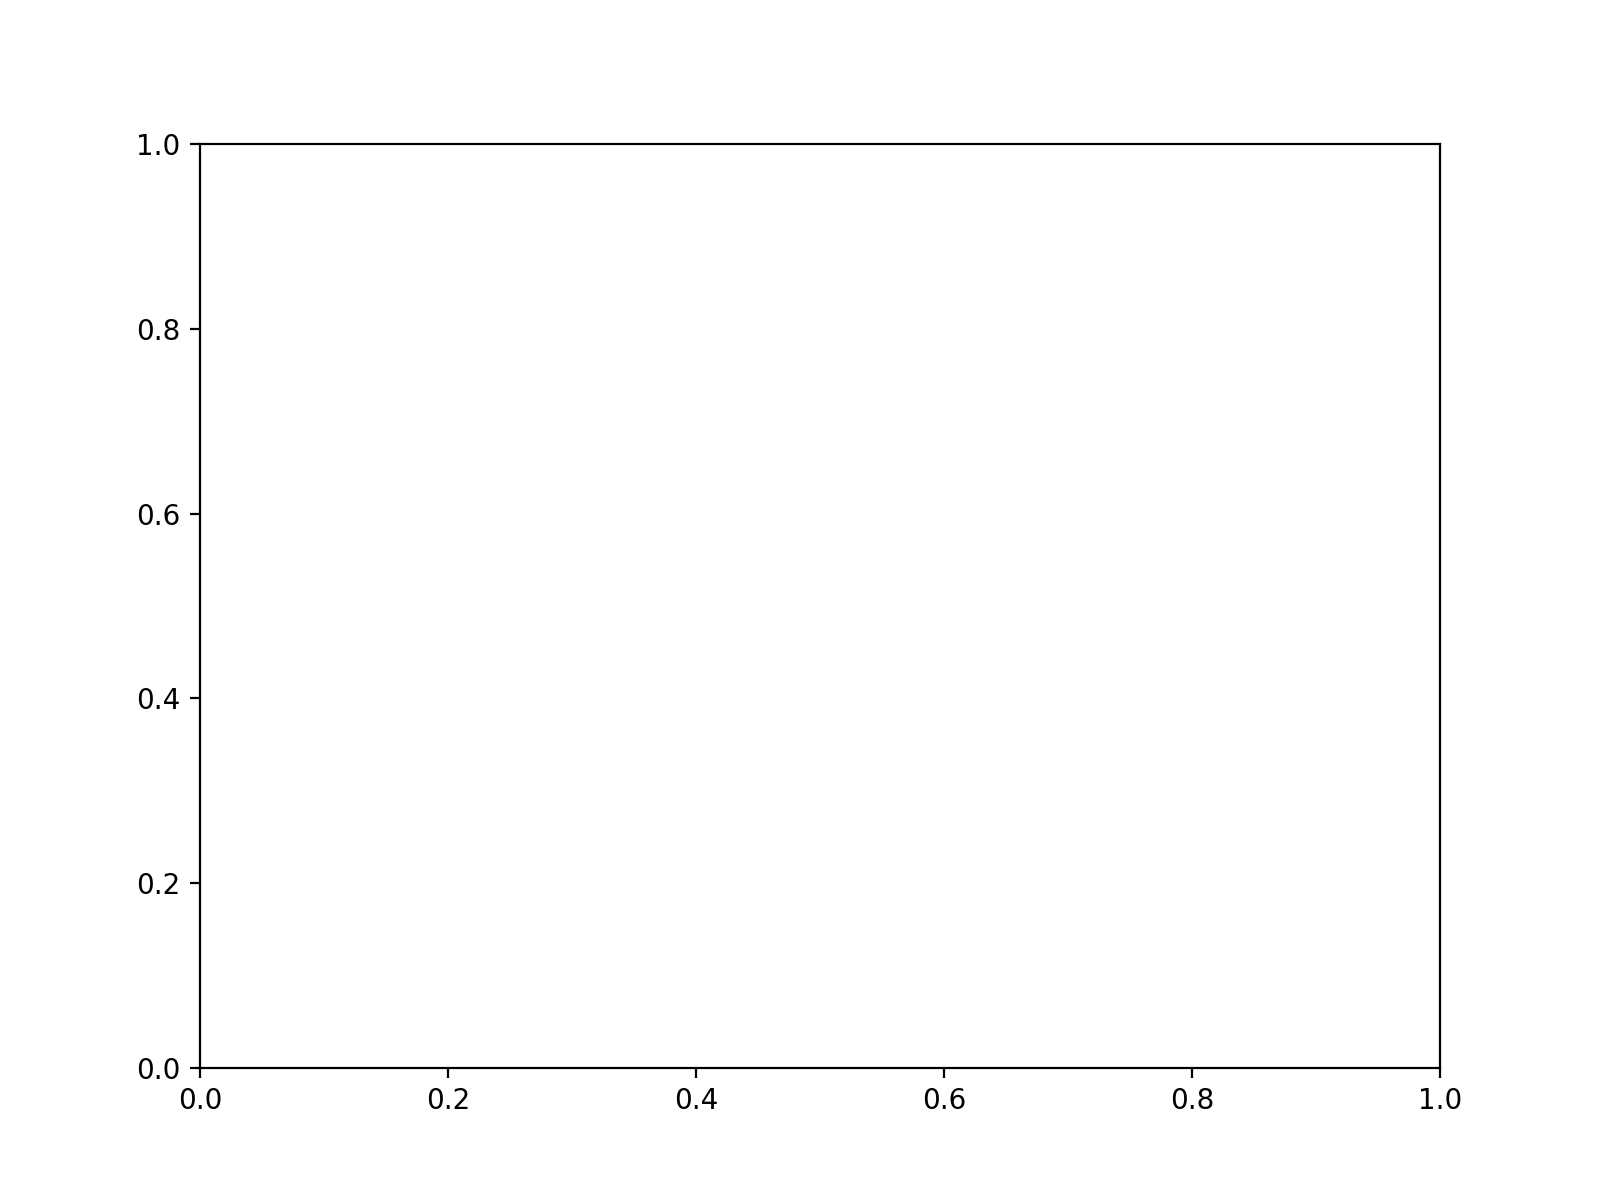

1.9927936905787453
0.3045595184749542


NameError: name 'p_gm_line' is not defined

In [19]:
%matplotlib notebook
fig1=plt.figure(figsize=(8,6), dpi= 100)
ax1 = fig1.add_subplot(111)

def cross1(pol1,pol2):
    idx_cross = np.argwhere(np.diff(np.sign(pol1(x_cross) - pol2(x_cross)))).flatten()
    v = (x_cross[idx_cross][0])
    i = (pol2(x_cross[idx_cross][0]))
    return v,i

#z_gm_line = [V_a_bias_total]
#p_gm_line - np.poly1d(z_gm_line)
#print(z_gm_line)
#print(p_gm_line)

print(p0(V_a_bias_total)-I_a_bias_total)
print(I_a_bias_total-p2(V_a_bias_total))

ax1.plot(x_cross,p0(x_cross),'-', x_cross, p_gm_line(x_cross),'-', );

#V_0_gm, I_0_gm = cross(p0,p_gm_line)
#print(V_0_gm, I_0_gm)

In [ ]:
arr = np.array([4, 5, 6, 7, 8, 9, 10, 11, 4, 5, 6, 33, 6, 7])
#arr = np.delete(arr, np.argwhere(arr == 6))
print(len(arr))
args = np.argwhere(arr > 7)
arr = np.delete(arr, args);
        
print('Modified Numpy Array :')
print(arr)

## Divided difference polynomial interpolation

In [374]:
new_p_x = np.linspace(0, 140)

new_p0_y = p0(new_p_x)
new_p1_y = p(new_p_x)
new_p2_y = p2(new_p_x)

In [383]:
new_p_y = np.linspace(0.0,3.0)

#new_p0_x = 

## Mean values of the polynomials

<IPython.core.display.Javascript object>


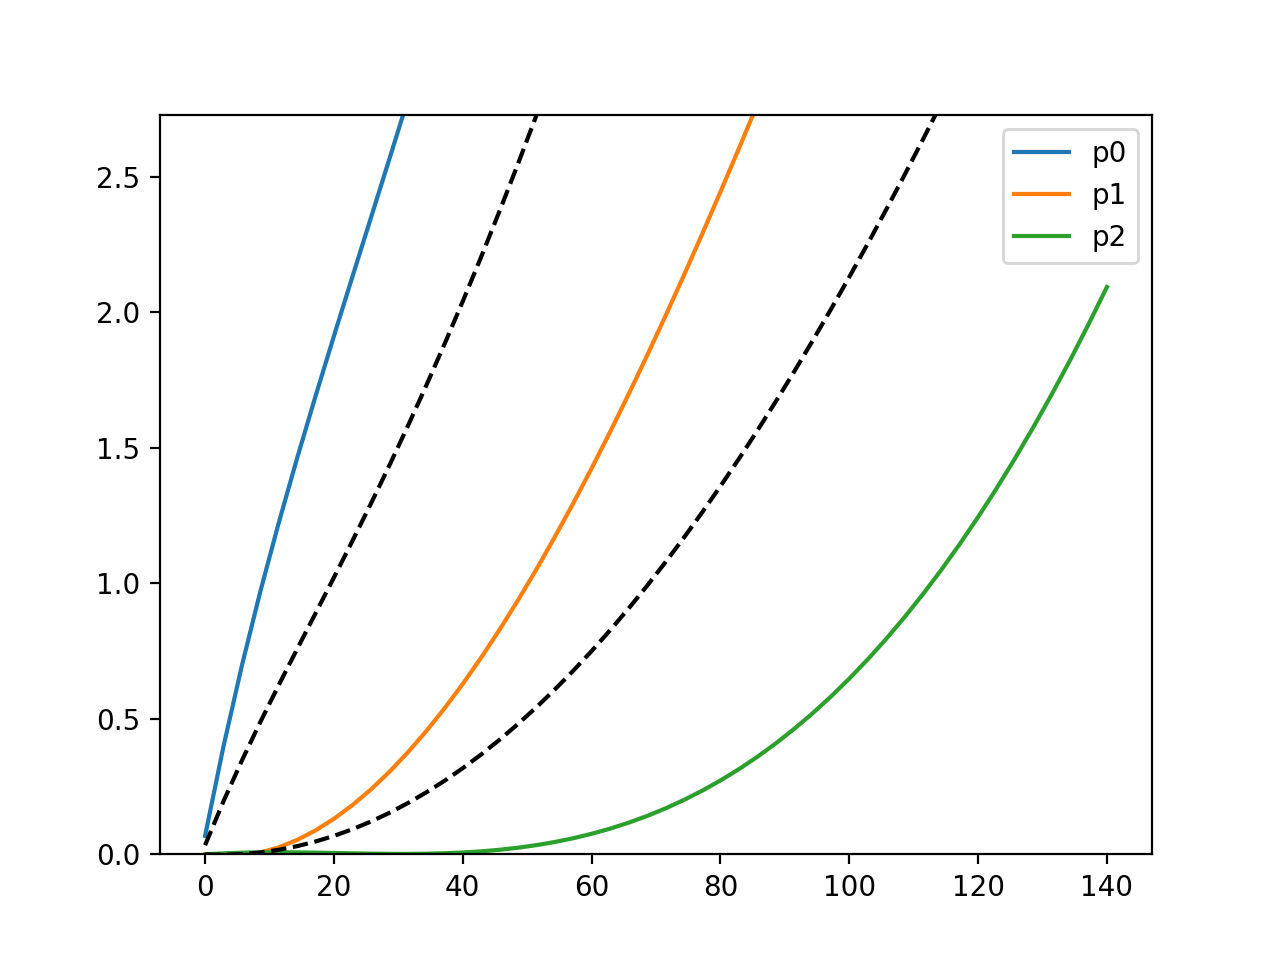

In [379]:
%matplotlib notebook

midy10 = [np.mean([new_p1_y[i], new_p0_y[i]]) for i in range(len(new_p1_y))]

midy12 = [np.mean([new_p1_y[i], new_p2_y[i]]) for i in range(len(new_p1_y))]

plt.plot(new_p_x, new_p0_y, label = 'p0')
plt.plot(new_p_x, new_p1_y, label='p1')
plt.plot(new_p_x, new_p2_y, label = 'p2')
plt.plot(new_p_x, midy10, '--', c='black')
plt.plot(new_p_x, midy12, '--', c='black')
#plt.plot([80,80],[0,3],'-')
plt.ylim((0,y0[-1]-14))
plt.legend(loc='best')
plt.show()